In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from helium import *
import requests
import time
import random
import os
import glob
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import japanize_matplotlib
import schedule
import datetime
from time import sleep

In [2]:
# pip install emoji
# !pip install opencv-python
# !pip install Pillow
# !pip install Japanize_matplotlib

In [3]:
twitter_login  = "https://twitter.com/"
heven_excelinatokyo_diary = "https://www.cityheaven.net/tokyo/A1305/A130505/excelinatokyo/diarylist/"
twitter_excelinatokyo = "https://twitter.com/excelinatokyo"
loctime1 = 1
loctime2 = 2
loctime3 = 3
loctime4 = 4
loctime5 = 5

In [4]:
def task():
    
    driver = start_chrome(twitter_excelinatokyo)
    driver.implicitly_wait(30) 
    driver.set_window_size(1600,1800)
    
    time.sleep(5)
    
    try:
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div[2]/div/div[2]/div[2]/div[2]/div/span/span").click()
    except:
        pass
    
    time.sleep(5)
    
    title1 = driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/div/div/section/div/div/div[2]/div/div/article/div/div/div[2]/div[2]/div[2]/div")
        
    title1 = title1.text
    bytes_emoji = title1.encode('shift-jis', errors='ignore')
    title1 = bytes_emoji.decode('shift-jis', errors='ignore')
    title1 = title1[:2]
    title1 = title1.replace(" ","").replace(" ","").replace("　","").replace("　","")
    title1 += "  " 
    
    go_to(heven_excelinatokyo_diary)
    
    
    file_list = glob.glob("D_*.jpg")

    for file in file_list:
        print("remove：{0}".format(file))
        os.remove(file)

    name = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/div/a")
    name = name.text


    href = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/div/a").get_attribute("href")
    href = href + "diary/#menus"

    title = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/h1/a")
    title = title.text
    bytes_emoji = title.encode('shift-jis', errors='ignore')
    title = bytes_emoji.decode('shift-jis', errors='ignore')
    title = title[:2]
    title = title.replace(" ","").replace(" ","").replace("　","").replace("　","")
    title += "  " 
    
    title3 = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/h1/a")
    title3 = title3.text
    bytes_emoji = title3.encode('shift-jis', errors='ignore')
    title3 = bytes_emoji.decode('shift-jis', errors='ignore')


    print(title)
    print(title1)
    
        
    if title1 == title:
        print()
        driver.quit()
        
    # if title1 == None:
    #     print("タイトルなし")
    #     driver.quit()
        
        
    else:
        try:
            text = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[3]")
            text = text.text
            text = text[:50] + "...続きはリンクをクリック"
            bytes_emoji = text.encode('shift-jis', errors='ignore')
            text = bytes_emoji.decode('shift-jis', errors='ignore')

            twitter_send = (
                f"{title3}\n"
                "-------------\n"
                f"{text}\n\n"
                f"{name}ちゃん\n"
                f"{href}\n"
                "※画像にはボカシがかかっております"
            )
            print(twitter_send)

            image_url = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[2]/a/img").get_attribute("src")
            file_name = "D_" + name + ".jpg"
            response = requests.get(image_url)
            image = response.content
            with open(file_name, "wb") as f:
                f.write(image)


            imagepath = "C:\\Users\\admin\\04.twitter\\" + file_name

            path_imgfile = file_name
            img = Image.open(path_imgfile)

            def contimages(img_proc, title: str):
                fig = plt.figure(figsize=(10,6))
                plt.rcParams["font.size"] = 14 #フォントサイズを設定

                for idx in range(2):
                    if idx == 0:
                        ax = fig.add_subplot(1,2,1) #1行2列の1番目のグラフ
                        ax.imshow(img) #オリジナル画像
                        ax.set_title('オリジナル画像', y=-0.10)        
                    else:
                        ax = fig.add_subplot(1,2,2) #1行2列のグラフを作成
                        ax.imshow(img_proc) #処理後画像
                        ax.set_title(f'処理画像({title})', y=-0.10) #タイトルを下に設定                 
                    plt.axis('off') #軸を消す   

                plt.show()

            # contimages(img, '処理した画像をこちらに表示') 

            def imageblur(img, reso: float):
                width, height = img.size #imgのオリジナルサイズ(幅・寸法を記憶)
                img_resize = img.resize((int(img.width/reso), int(img.height /reso))) #縮小
                img_blur = img_resize.resize((width, height)) #オリジナルサイズの戻す
                return img_blur   

            img_blur = imageblur(img, reso=5)
            contimages(img_blur, title='ぼかし処理5倍') #画像を表示
            # img_blur = imageblur(img, reso=10)
            # contimages(img_blur, title='ぼかし処理10倍') #画像を表示

            img_blur.save(file_name)
        except:
            pass

        for x in range(100):
            go_to(twitter_login)
            time.sleep(1)
            try:
                click("ログイン")
                break
            except:
                continue
        time.sleep(4)
        driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input").send_keys("excelinatokyo")
        try:
            driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[3]/div/div/div/div/div/div[2]/div[2]/div/div[2]/div/div[2]/div[2]/div[2]").click()
        except:
            pass
        driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[6]/div/span/span").click()
        time.sleep(4)
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input").send_keys("jenny4340")
        time.sleep(4)
        driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/div/div/span/span").click()
        time.sleep(3)
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/header/div/div/div/div[1]/div[3]/a/div/span/div/div/span/span").click()
        time.sleep(3)
        try:
            driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div[2]/div[1]/div/div/div/div/div[2]/div[1]/div/div/div/div/div/div[2]/div/div/div/div/label/div[1]/div/div/div/div/div/div[2]/div/div/div/div").send_keys(twitter_send)
        except:
            print("local variable 'twitter_send' referenced before assignment")
            driver.quit()
            
        time.sleep(3)
        
        try:
            image = glob.glob(imagepath)
            driver.find_element_by_xpath('//input[@type="file"]').send_keys(image)
            driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div/div[1]/div/div/div/div/div[2]/div[3]/div/div/div[2]/div[4]/div/span/span").click()
            time.sleep(3)
            driver.quit()
        except:
            pass
        
        try:
            driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div/div[1]/div/div/div/div/div[2]/div[3]/div/div/div[2]/div[4]/div/span/span").click()
            time.sleep(3)
            driver.quit()
        except:
            pass
        
        texts = (
        
            f"\n{name}:update_diary_in_twitter"
            
        )
        
        ACCESS_TOKEN = "W9px327yYoV7narEXz6EOiIJ8IvqBoa1wRvNUs5ikmf"

        def main():
            api_url = "https://notify-api.line.me/api/notify"
            headers = {"Authorization":"Bearer {}".format(ACCESS_TOKEN)}
            data = {"message":texts}

            requests.post(api_url, headers=headers,data=data)

        if __name__=="__main__":
            main()

In [5]:
schedule.every(2).seconds.do(task)

Every 2 seconds do task() (last run: [never], next run: 2023-04-07 00:49:12)

In [6]:
schedule.every(180).seconds.do(task)

Every 180 seconds do task() (last run: [never], next run: 2023-04-07 00:52:10)

remove：D_ちか【中毒性高身長キレイ系】.jpg
  
本日  

-------------
マイガール限定の日記です。
閲覧するには「ちか【中毒性高身長キレイ系】」さんをマイガール登録(お気に...続きはリンクをクリック

ちか【中毒性高身長キレイ系】ちゃん
https://www.cityheaven.net/tokyo/A1305/A130505/excelinatokyo/girlid-44443007/diary/#menus
※画像にはボカシがかかっております


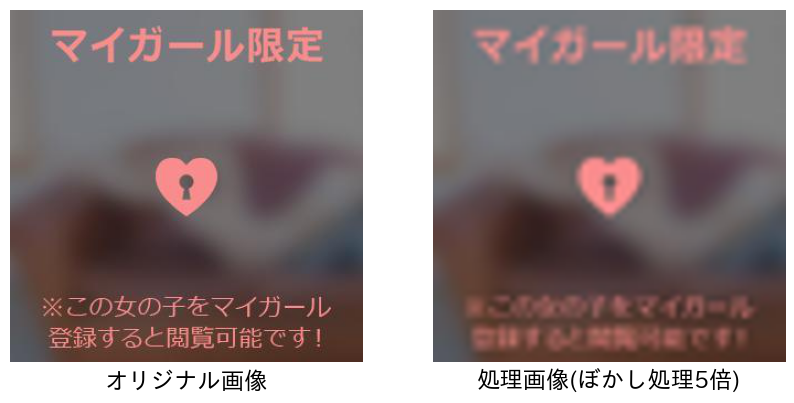

remove：D_ちか【中毒性高身長キレイ系】.jpg
  
--  

-------------
マイガール限定の日記です。
閲覧するには「ちか【中毒性高身長キレイ系】」さんをマイガール登録(お気に...続きはリンクをクリック

ちか【中毒性高身長キレイ系】ちゃん
https://www.cityheaven.net/tokyo/A1305/A130505/excelinatokyo/girlid-44443007/diary/#menus
※画像にはボカシがかかっております


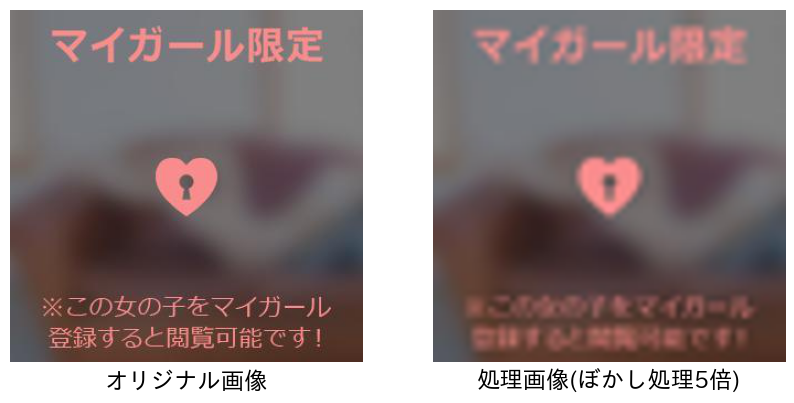

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_85496\1416372374.py", line 2, in <module>
    schedule.run_pending()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 780, in run_pending
    default_scheduler.run_pending()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 100, in run_pending
    self._run_job(job)
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 172, in _run_job
    ret = job.run()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 661, in run
    ret = self.job_func()
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_85496\4267078840.py", line 3, in task
    driver = start_chrome(twitter_excelinatokyo)
  File "C:\Users\admin\anaconda3\lib\site-packages\h

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_85496\1416372374.py", line 2, in <module>
    schedule.run_pending()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 780, in run_pending
    default_scheduler.run_pending()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 100, in run_pending
    self._run_job(job)
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 172, in _run_job
    ret = job.run()
  File "C:\Users\admin\anaconda3\lib\site-packages\schedule\__init__.py", line 661, in run
    ret = self.job_func()
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_85496\4267078840.py", line 3, in task
    driver = start_chrome(twitter_excelinatokyo)
  File "C:\Users\admin\anaconda3\lib\site-packages\h

In [ ]:
while True:
    schedule.run_pending()
    sleep(1)

In [7]:

driver = start_chrome(twitter_excelinatokyo)
driver.implicitly_wait(30) 
driver.set_window_size(1600,1800)

time.sleep(5)

try:
    driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div[2]/div/div[2]/div[2]/div[2]/div/span/span").click()
except:
    pass

time.sleep(5)

title1 = driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/main/div/div/div/div[1]/div/div[3]/div/div/section/div/div/div[2]/div/div/article/div/div/div[2]/div[2]/div[2]/div")

title1 = title1.text
bytes_emoji = title1.encode('shift-jis', errors='ignore')
title1 = bytes_emoji.decode('shift-jis', errors='ignore')
title1 = title1[:2]
title1 = title1.replace(" ","").replace(" ","").replace("　","").replace("　","")
title1 += "  " 

go_to(heven_excelinatokyo_diary)


file_list = glob.glob("D_*.jpg")

for file in file_list:
    print("remove：{0}".format(file))
    os.remove(file)

name = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/div/a")
name = name.text


href = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/div/a").get_attribute("href")
href = href + "diary/#menus"

title = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/h1/a")
title = title.text
bytes_emoji = title.encode('shift-jis', errors='ignore')
title = bytes_emoji.decode('shift-jis', errors='ignore')
title = title[:2]
title = title.replace(" ","").replace(" ","").replace("　","").replace("　","")
title += "  " 

title3 = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[1]/h1/a")
title3 = title3.text
bytes_emoji = title3.encode('shift-jis', errors='ignore')
title3 = bytes_emoji.decode('shift-jis', errors='ignore')


print(title)
print(title1)


if title1 == title:
    print()
    driver.quit()

# if title1 == None:
#     print("タイトルなし")
#     driver.quit()


else:
    try:
        text = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[3]")
        text = text.text
        text = text[:50] + "...続きはリンクをクリック"
        bytes_emoji = text.encode('shift-jis', errors='ignore')
        text = bytes_emoji.decode('shift-jis', errors='ignore')

        twitter_send = (
            f"{title3}\n"
            "-------------\n"
            f"{text}\n\n"
            f"{name}ちゃん\n"
            f"{href}\n"
            "※画像にはボカシがかかっております"
        )
        print(twitter_send)

        image_url = driver.find_element_by_xpath("/html/body/div[5]/div[3]/div/div/div/div[3]/div[3]/article[1]/div[2]/a/img").get_attribute("src")
        file_name = "D_" + name + ".jpg"
        response = requests.get(image_url)
        image = response.content
        with open(file_name, "wb") as f:
            f.write(image)


        imagepath = "C:\\Users\\admin\\04.twitter\\" + file_name

        path_imgfile = file_name
        img = Image.open(path_imgfile)

        def contimages(img_proc, title: str):
            fig = plt.figure(figsize=(10,6))
            plt.rcParams["font.size"] = 14 #フォントサイズを設定

            for idx in range(2):
                if idx == 0:
                    ax = fig.add_subplot(1,2,1) #1行2列の1番目のグラフ
                    ax.imshow(img) #オリジナル画像
                    ax.set_title('オリジナル画像', y=-0.10)        
                else:
                    ax = fig.add_subplot(1,2,2) #1行2列のグラフを作成
                    ax.imshow(img_proc) #処理後画像
                    ax.set_title(f'処理画像({title})', y=-0.10) #タイトルを下に設定                 
                plt.axis('off') #軸を消す   

            plt.show()

        # contimages(img, '処理した画像をこちらに表示') 

        def imageblur(img, reso: float):
            width, height = img.size #imgのオリジナルサイズ(幅・寸法を記憶)
            img_resize = img.resize((int(img.width/reso), int(img.height /reso))) #縮小
            img_blur = img_resize.resize((width, height)) #オリジナルサイズの戻す
            return img_blur   

        img_blur = imageblur(img, reso=5)
        contimages(img_blur, title='ぼかし処理5倍') #画像を表示
        # img_blur = imageblur(img, reso=10)
        # contimages(img_blur, title='ぼかし処理10倍') #画像を表示

        img_blur.save(file_name)
    except:
        pass

    for x in range(100):
        go_to(twitter_login)
        time.sleep(1)
        try:
            click("ログイン")
            break
        except:
            continue
    time.sleep(4)
    driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[5]/label/div/div[2]/div/input").send_keys("excelinatokyo")
    try:
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[3]/div/div/div/div/div/div[2]/div[2]/div/div[2]/div/div[2]/div[2]/div[2]").click()
    except:
        pass
    driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[6]/div/span/span").click()
    time.sleep(4)
    driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input").send_keys("excvbnm123")    driver.find_element_by_xpath("/html/body/div/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/div/div/span/span").click()
    time.sleep(3)
    driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/header/div/div/div/div[1]/div[3]/a/div/span/div/div/span/span").click()
    time.sleep(3)
    try:
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div[2]/div[1]/div/div/div/div/div[2]/div[1]/div/div/div/div/div/div[2]/div/div/div/div/label/div[1]/div/div/div/div/div/div[2]/div/div/div/div").send_keys(twitter_send)
    except:
        print("local variable 'twitter_send' referenced before assignment")
        driver.quit()

    time.sleep(3)

    try:
        image = glob.glob(imagepath)
        driver.find_element_by_xpath('//input[@type="file"]').send_keys(image)
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div/div[1]/div/div/div/div/div[2]/div[3]/div/div/div[2]/div[4]/div/span/span").click()
        time.sleep(3)
        driver.quit()
    except:
        pass

    try:
        driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div/div[3]/div/div[1]/div/div/div/div/div[2]/div[3]/div/div/div[2]/div[4]/div/span/span").click()
        time.sleep(3)
        driver.quit()
    except:
        pass

    texts = (

        f"\n{name}:update_diary_in_twitter"

    )

    ACCESS_TOKEN = "W9px327yYoV7narEXz6EOiIJ8IvqBoa1wRvNUs5ikmf"

    def main():
        api_url = "https://notify-api.line.me/api/notify"
        headers = {"Authorization":"Bearer {}".format(ACCESS_TOKEN)}
        data = {"message":texts}

        requests.post(api_url, headers=headers,data=data)

    if __name__=="__main__":
        main()

SyntaxError: invalid syntax (830802061.py, line 147)

ERROR! Session/line number was not unique in database. History logging moved to new session 8651


In [ ]:
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input").send_keys("excvbnm123")

In [ ]:
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[2]/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input").send_keys("jenny4340")